# **Recommender Systems - Model Pipeline Assignment** - John Bhanini

## Surprise Library

In [1]:
! pip install surprise

     |████████████████████████████████| 11.8MB 356kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618294 sha256=7937a595beef3c4e71ba96872614549b325b8646c98e5caaa43d907158177d77
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


## Loading the Data:

In [6]:
from surprise import Dataset
from surprise import Reader

reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('/content/ratings.csv', reader)

Split data in Train and Test set:

In [7]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=.25)

## Training our Models:


In [25]:
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.baseline_only import BaselineOnly

Training a user-based model using cosine similarity:

In [15]:
algo_cosine_user = KNNBasic(k=10,min_k=2,sim_options={'name':'cosine','user_based':True})
algo_cosine_user.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Training a user-based Pearson correlation similarity:

In [16]:
algo_pearson_user = KNNBasic(k=10,min_k=2,sim_options={'name':'pearson','user_based':True})
algo_pearson_user.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


Training an item-based cosine similairy:

In [17]:
algo_cosine_item = KNNBasic(k=10,min_k=2,sim_options={'name':'cosine','user_based':False})
algo_cosine_item.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Training an item-based Pearson similarity:

In [18]:
algo_pearson_item = KNNBasic(k=10,min_k=2,sim_options={'name':'pearson','user_based':False})
algo_pearson_item.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


Training a Baseline-only model:

In [26]:
algo_baseline = BaselineOnly({'method': 'als', 'n_epochs': 5, 'reg_u': 12, 'reg_i': 5})
algo_baseline.fit(trainset)

Estimating biases using als...


## Making predictions with our models:

In [29]:
predict_cosine_user = algo_cosine_user.test(testset)
predict_pearson_user = algo_pearson_user.test(testset)
predict_cosine_item = algo_cosine_item.test(testset)
predict_pearson_item = algo_pearson_item.test(testset)
predict_baseline = algo_baseline.test(testset)

## Cross Validation & Evaluation:

In [76]:
from surprise.model_selection import cross_validate
import pandas as pd
benchmark = []
models = [algo_cosine_user, algo_pearson_user, algo_cosine_item, algo_pearson_item, algo_baseline]

for algorithm in models:
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)

    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-2]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases us

,test_rmse,test_mae,fit_time,test_time,Algorithm
0,0.989909,0.762214,0.292995,1.775704,knns
1,0.990829,0.768336,0.389982,1.775696,knns
2,1.019499,0.795460,13.152099,9.618462,knns
3,1.010495,0.784904,17.745786,10.303965,knns
4,0.871281,0.671071,0.147979,0.229361,baseline_only


In [92]:
evaluations = pd.DataFrame(benchmark).drop('Algorithm',1)
evaluations['Model'] = ['Cosine User', 'Pearson User', 'Cosine Item', 'Pearson Item', 'Baseline ']
evaluations.set_index('Model', drop=True, inplace=True)
evaluations

,test_rmse,test_mae,fit_time,test_time
Model,,,,
Cosine User,0.989909,0.762214,0.292995,1.775704
Pearson User,0.990829,0.768336,0.389982,1.775696
Cosine Item,1.019499,0.795460,13.152099,9.618462
Pearson Item,1.010495,0.784904,17.745786,10.303965
Baseline,0.871281,0.671071,0.147979,0.229361


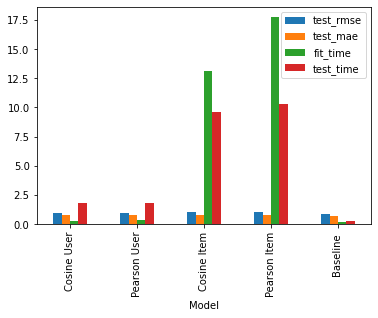

In [93]:
import matplotlib.pyplot as plt
evaluations.plot.bar()